In [3]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


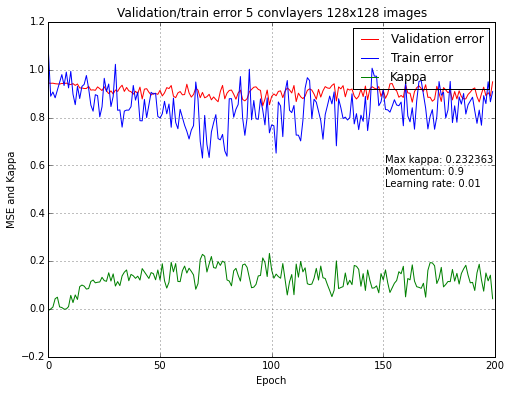

In [14]:
# first model

result = np.load("../data/tidy/5conv_2dense.npy")
epochs = np.arange(200)

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1], 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0], 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE and Kappa")
plt.title("Validation/train error 5 convlayers 128x128 images")
plt.text(151, 0.61,"Max kappa: %f" % result[2].max())
plt.text(151, 0.56, "Momentum: 0.9")
plt.text(151, 0.51, "Learning rate: 0.01")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend()
plt.grid()
plt.show()